In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('palm_ffb.csv')

# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


The max FFB_Yield is 2.27 tonnes, now let's see the the value of other variables that might be related to FFB_Yield by comparing top 10 FFB_Yield & bottom 10 FFB_Yield.

In [5]:
df.nlargest(10, 'FFB_Yield', keep='all')

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
118,01.11.2017,592.9,26.530000,22.1,33.8,327.3,26,760970.4846,2.27
117,01.10.2017,547.5,27.474194,21.2,35.4,219.0,24,765351.3274,2.26
119,01.12.2017,619.0,26.441935,22.2,33.1,301.0,24,756968.0365,2.19
79,01.08.2014,542.8,26.212903,21.0,32.3,250.0,26,785828.0374,2.14
44,01.09.2011,516.4,26.793333,20.9,34.6,192.8,25,765963.9423,2.08
56,01.09.2012,493.2,26.620000,21.2,33.1,187.5,25,781224.0385,2.08
21,01.10.2009,544.0,27.193548,21.7,33.3,211.4,26,797374.8792,2.07
116,01.09.2017,539.0,27.066667,21.2,33.8,185.4,21,768186.4734,2.07
45,01.10.2011,558.6,26.538710,21.7,33.5,265.3,25,764421.0784,2.04
57,01.10.2012,509.2,26.961290,21.6,34.1,172.4,26,749296.5686,2.04


In [6]:
df.nsmallest(10, 'FFB_Yield', keep='all')

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
36,01.01.2011,647.3,25.170968,21.1,31.5,496.1,24,830578.7037,1.08
49,01.02.2012,547.2,26.372414,20.8,34.1,129.1,24,829962.3853,1.09
96,01.01.2016,553.4,26.767742,22.2,33.2,106.8,26,746198.1818,1.10
97,01.02.2016,519.1,26.441379,21.9,32.3,175.7,23,766853.1532,1.11
50,01.03.2012,539.9,26.558065,21.6,33.0,208.9,27,834886.6071,1.12
37,01.02.2011,594.9,26.217857,20.3,34.6,22.1,21,808268.1416,1.13
25,01.02.2010,458.2,27.492857,21.5,35.1,49.0,22,840834.4828,1.16
84,01.01.2015,576.3,25.925806,20.4,33.1,77.1,26,745641.8803,1.17
98,01.03.2016,460.5,27.896774,21.5,35.9,36.5,26,796784.7458,1.18
73,01.02.2014,457.8,26.882143,19.0,34.9,2.0,23,784703.3333,1.20


It seems that it was not clear from these tables alone. Correlation table might help to unravel the facts.

Normalize the value to avoid bias due to high value on certain variables

In [7]:
# copy the data 
df_max_scaled = df.copy()
#we could try to change date into numerical value to be included in the correlation
df_max_scaled.Date=pd.to_datetime(df_max_scaled.Date)
df_max_scaled.Date=pd.to_numeric(df_max_scaled.Date)
# df_max_scaled = df.iloc[:,1:].copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 

In [8]:
df_max_scaled.describe()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.894075,0.815151,0.939465,0.945984,0.940321,0.380933,0.916809,0.899292,0.705829
std,0.065310,0.088626,0.022793,0.030485,0.029990,0.161736,0.045900,0.039037,0.124119
min,0.791232,0.588135,0.880268,0.836283,0.863889,0.004031,0.777778,0.774643,0.475771
25%,0.833376,0.754866,0.925202,0.929204,0.919444,0.282806,0.888889,0.871593,0.612335
50%,0.895644,0.831608,0.942290,0.951327,0.941667,0.367164,0.925926,0.895474,0.698238
75%,0.957856,0.882164,0.954189,0.964602,0.961111,0.455755,0.962963,0.931692,0.796256
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [10]:
#count no of outliers
for i,j in df.items():
    if df[i].dtypes != 'O':
        #make sure it is not object type and apply fillna
        print('Column Name : ', i)
        print('No of outliers : ', len(find_anomalies(df[i].fillna(0))))
        print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0)))/df.shape[0]*100,2))
        #if it is a float type, convert to int
        if df[i].dtypes == 'float64':
            print('Column Name : ', i)
            print('No of outliers : ', len(find_anomalies(df[i].fillna(0).astype(int))))
            print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0).astype(int)))/df.shape[0]*100,2))

Column Name :  SoilMoisture
No of outliers :  0
Outliers % :  0.0
Column Name :  SoilMoisture
No of outliers :  0
Outliers % :  0.0
Column Name :  Average_Temp
No of outliers :  0
Outliers % :  0.0
Column Name :  Average_Temp
No of outliers :  0
Outliers % :  0.0
Column Name :  Min_Temp
No of outliers :  3
Outliers % :  2.31
Column Name :  Min_Temp
No of outliers :  1
Outliers % :  0.77
Column Name :  Max_Temp
No of outliers :  0
Outliers % :  0.0
Column Name :  Max_Temp
No of outliers :  0
Outliers % :  0.0
Column Name :  Precipitation
No of outliers :  1
Outliers % :  0.77
Column Name :  Precipitation
No of outliers :  1
Outliers % :  0.77
Column Name :  Working_days
No of outliers :  3
Outliers % :  2.31
Column Name :  HA_Harvested
No of outliers :  1
Outliers % :  0.77
Column Name :  HA_Harvested
No of outliers :  1
Outliers % :  0.77
Column Name :  FFB_Yield
No of outliers :  0
Outliers % :  0.0
Column Name :  FFB_Yield
No of outliers :  0
Outliers % :  0.0


The outliers detected using 3STD technique are very minimal.

<Axes: >

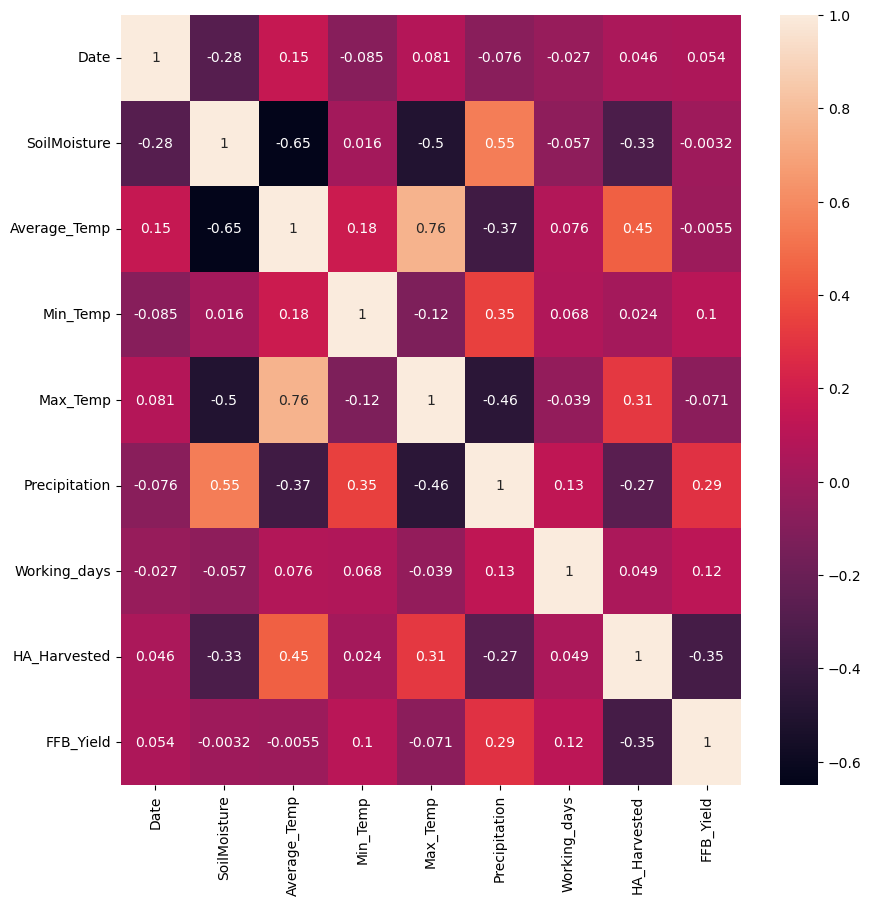

In [11]:
#check the correlation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_max_scaled.corr(),annot=True)

The correlation between other variables to the FFB_Yield are quite low or average at most. Other than that, Max_Temp has high positive correlation with Average_Temp which is to be expected as both variables are related. Furthermore, the Precipitation also has average positive correlation with SoilMoisture which can be expected as the SoilMoisture depends on the Precipitation amount. Among all the variables related to the target, only HA_Harvested and Precipitation have the highest correlation with FFB_Yield. But contrary to the logic, the lower the HA_Harvested, the higher FFB_Yield might be. As for the Precipitation, the higher precipitation, the higher FFB_Yield is going to be. But these two have very low impact on FFB_Yield, which shows that there are other factors that contribute to FFB_Yield increases.

Now, let's try feature importance via Random Forest & XGBoost

In [12]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Separate features and target
X = df_max_scaled.drop('FFB_Yield', axis=1)
y = df_max_scaled['FFB_Yield']

# Initialize Random Forest model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


         Feature  Importance
7   HA_Harvested    0.291136
5  Precipitation    0.217637
2   Average_Temp    0.133322
0           Date    0.127540
1   SoilMoisture    0.096043
4       Max_Temp    0.059302
3       Min_Temp    0.052165
6   Working_days    0.022855


In [13]:
import xgboost as xgb
import pandas as pd

# Separate features and target
X = df_max_scaled.drop('FFB_Yield', axis=1)
y = df_max_scaled['FFB_Yield']

# Initialize XGBoost model
xgboost_model = xgb.XGBRegressor()

# Fit the model
xgboost_model.fit(X, y)

# Get feature importances
feature_importances = xgboost_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

         Feature  Importance
7   HA_Harvested    0.282202
5  Precipitation    0.246940
2   Average_Temp    0.127252
3       Min_Temp    0.115869
0           Date    0.073705
1   SoilMoisture    0.070380
4       Max_Temp    0.046382
6   Working_days    0.037270


The results are not dissimilar to what we obtained on heatmap via Pearson correlation. Now, let's see the distribution of other variables against FFB_Yield using scatterplot since both have quantitative values.

In [14]:
def scatter_plot(df,x,y):
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")
    # xlabel = str(x)
    # ylabel = str(y)
    # Calculate the IQR to remove outliers
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

    # Create a histogram to visualize the distribution
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"Distribution of {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

In [19]:
predictor = list(df_max_scaled.columns)
predictor.remove('FFB_Yield')

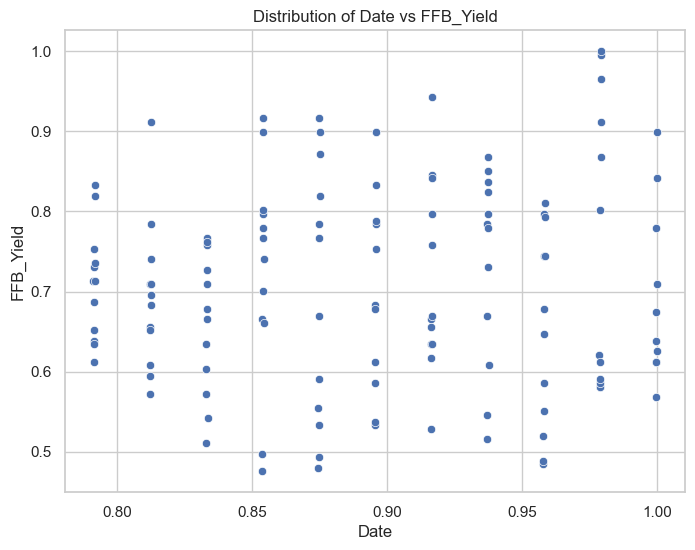

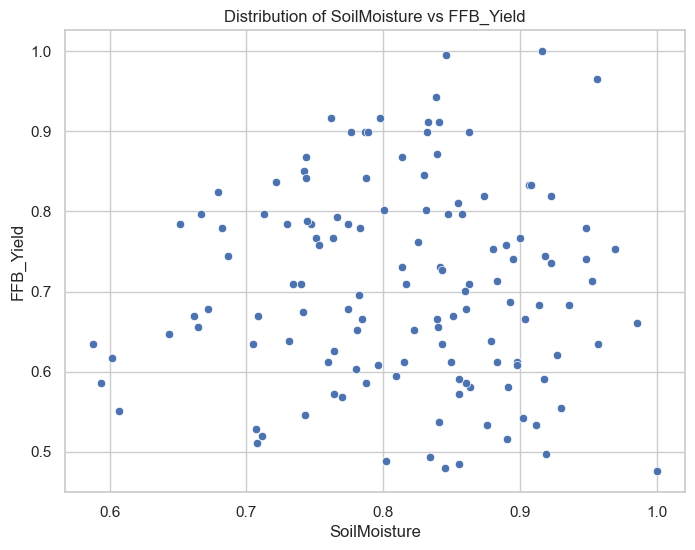

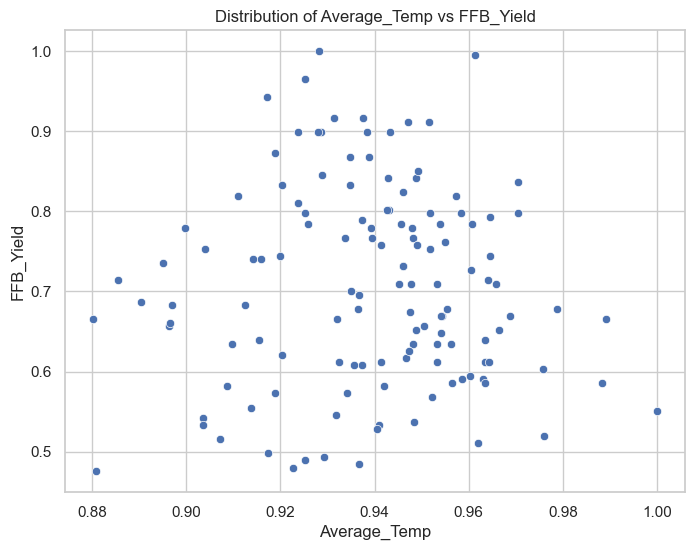

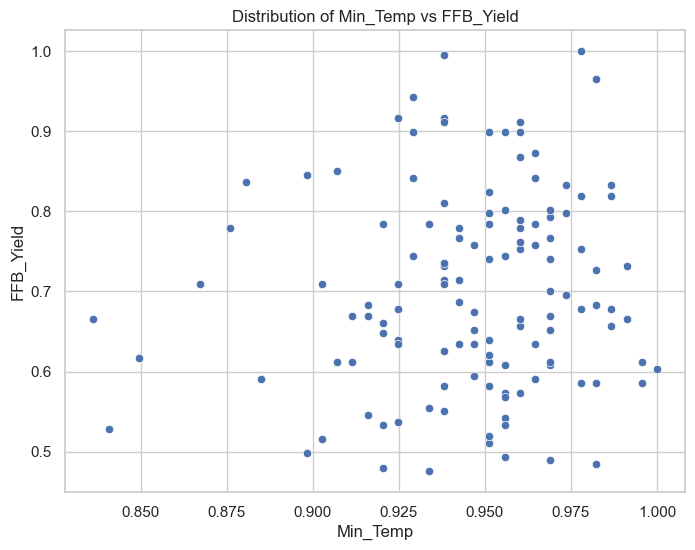

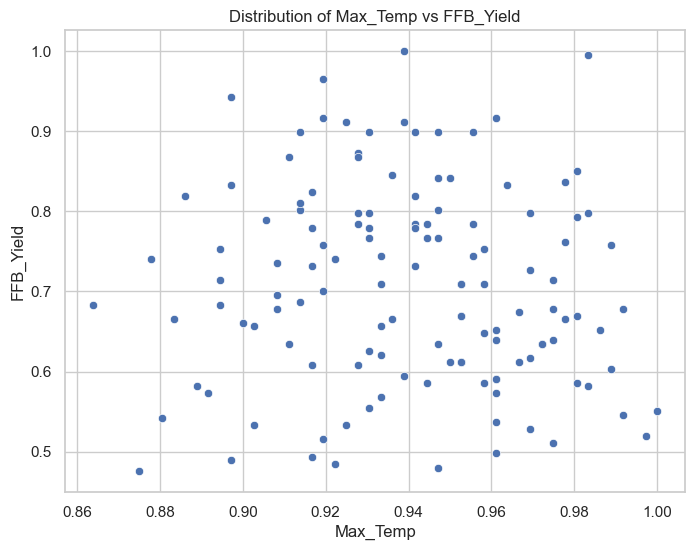

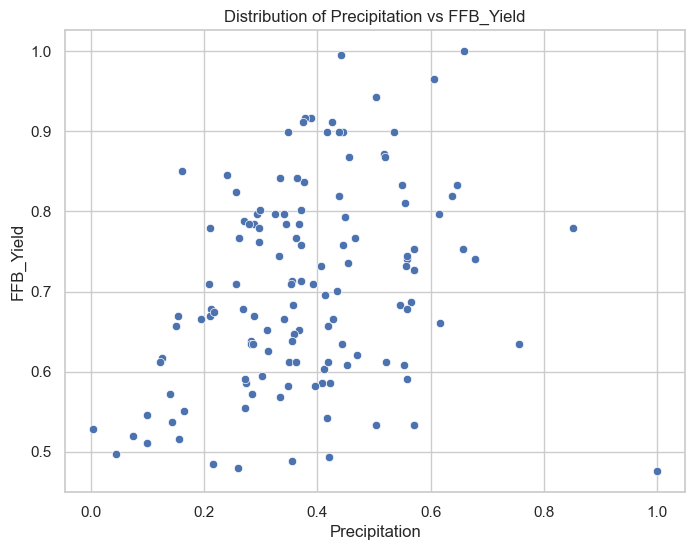

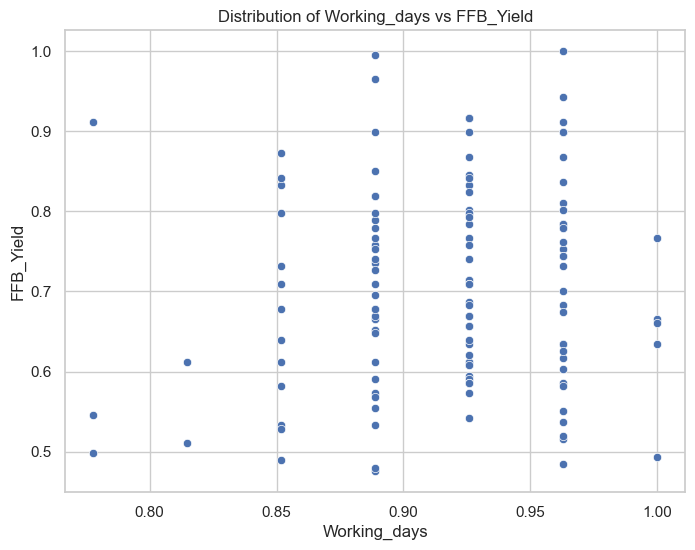

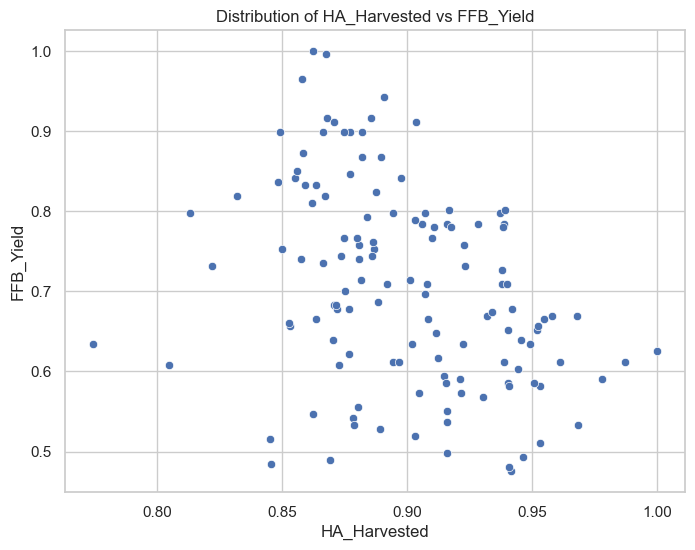

In [20]:
for i in predictor:
    scatter_plot(df_max_scaled,i,'FFB_Yield')

Analysis from the distribution:
* SoilMoisture vs FFB_Yield : It can be infered that the most of the data points of SoilMositure are between 500 to 600
* Average_Temp vs FFB_Yield : It can be said that the most of the data points of Average_Temp are between 26 to 27.5
* Precipitation vs FFB_Yield : The data points of Precipitation are mostly between 100 to 300
* HA_Harvested vs FFB_Yield : Most of the data points of HA_Harvested are between 775000 to 825000
* Both Date & Working_days doesn't seem to effect FFB_Yield as they're part of time component which continuously increases in value regardless what happen to FFB_Yield or any other variables.